# <center>  Régresssion Logistique avec Etude du Cas </center>

In [1]:
import numpy as np # importer numpy 
import matplotlib.pyplot as plt # importer matplotlib.pylot
import scipy as sc # importer scipy
import pandas as pd  # importer pandas
import seaborn as sns # importer seaborn
from scipy.special import expit, logit


%matplotlib inline



# I) Problèmatique 

L'objectif du gérant du magasin APPLE, est d'augmenter de 10% le chiffre d'affaires pour le mois prochain. 
Il fait appel à un Développeur Intelligence Artificielle en lui fournissant la base de données des clients de son magasin. Le Développeur IA, a pour mission de renseigner les clients potentiels afin de maximiser le montant de ses ventes.

# II) Démarche de la solution proposée

Le développeur IA propose une solution en suivant une approche systématique 

## 1) Analyse et prétraitement de la base de donnée

In [2]:
DataClientsApple0 = pd.read_csv('DataClientsApple.csv')

In [3]:
print(DataClientsApple0)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [4]:
DataClientsApple0.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
DataClientsApple0['Gender'] = DataClientsApple0['Gender'].astype('category').cat.codes

In [6]:
DataClientsApple0.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [7]:
print(DataClientsApple0)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [8]:
DataClientsApple1=DataClientsApple0.copy()

In [9]:
del DataClientsApple1['User ID']

In [10]:
DataClientsApple1.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [11]:
print(DataClientsApple1)
#sns.catplot(x="Age", y="Purchased", hue="EstimatedSalary", data=DataClientsApple1)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc75430ebe0>,
      dtype=object)

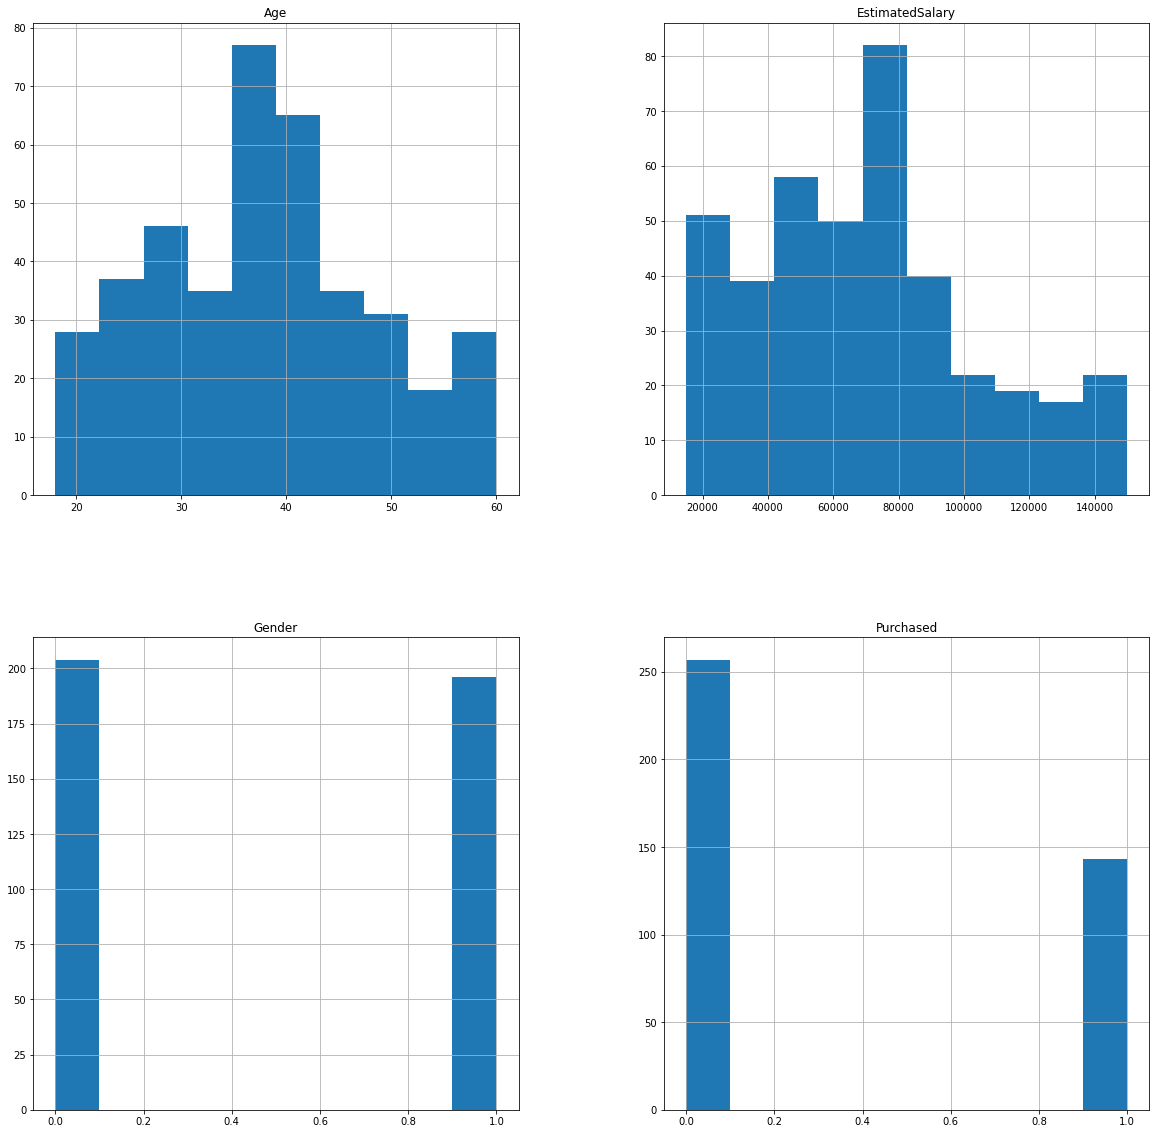

In [12]:
plt.rcParams["figure.figsize"]=20,20
DataClientsApple1.hist()

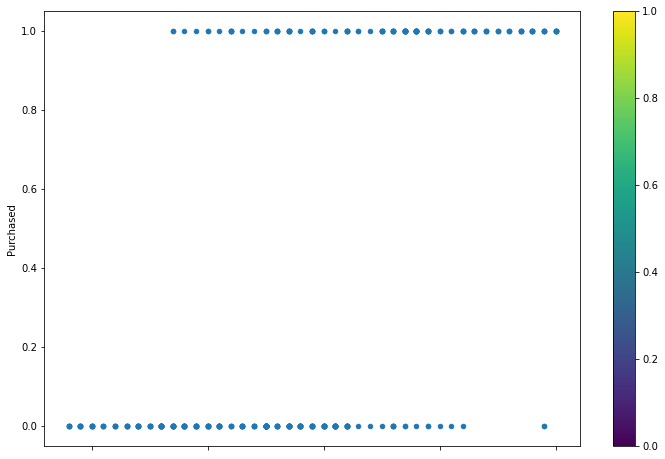

In [13]:
DataClientsApple1.plot.scatter("Age", "Purchased", colormap='viridis',figsize=(12, 8))

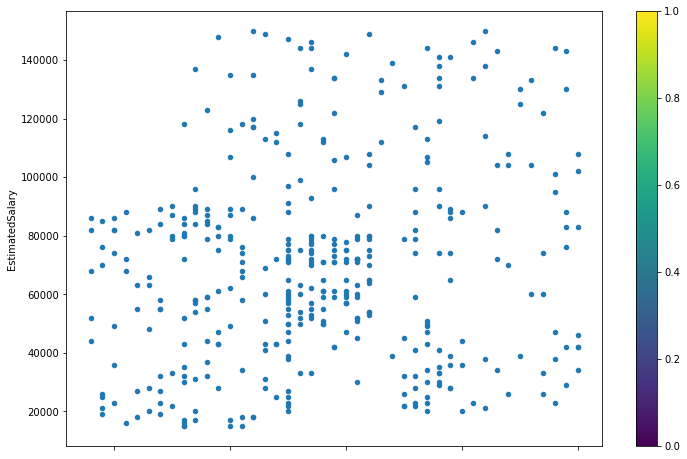

In [14]:
DataClientsApple1.plot.scatter("Age", "EstimatedSalary", colormap='viridis',figsize=(12, 8))

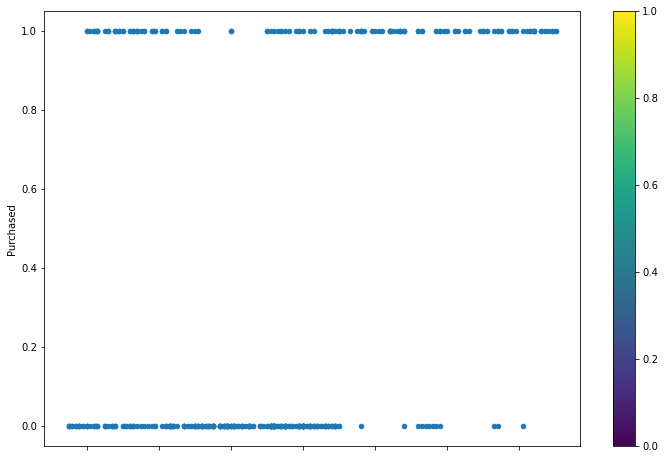

In [15]:
DataClientsApple1.plot.scatter("EstimatedSalary","Purchased", colormap='viridis',figsize=(12, 8))

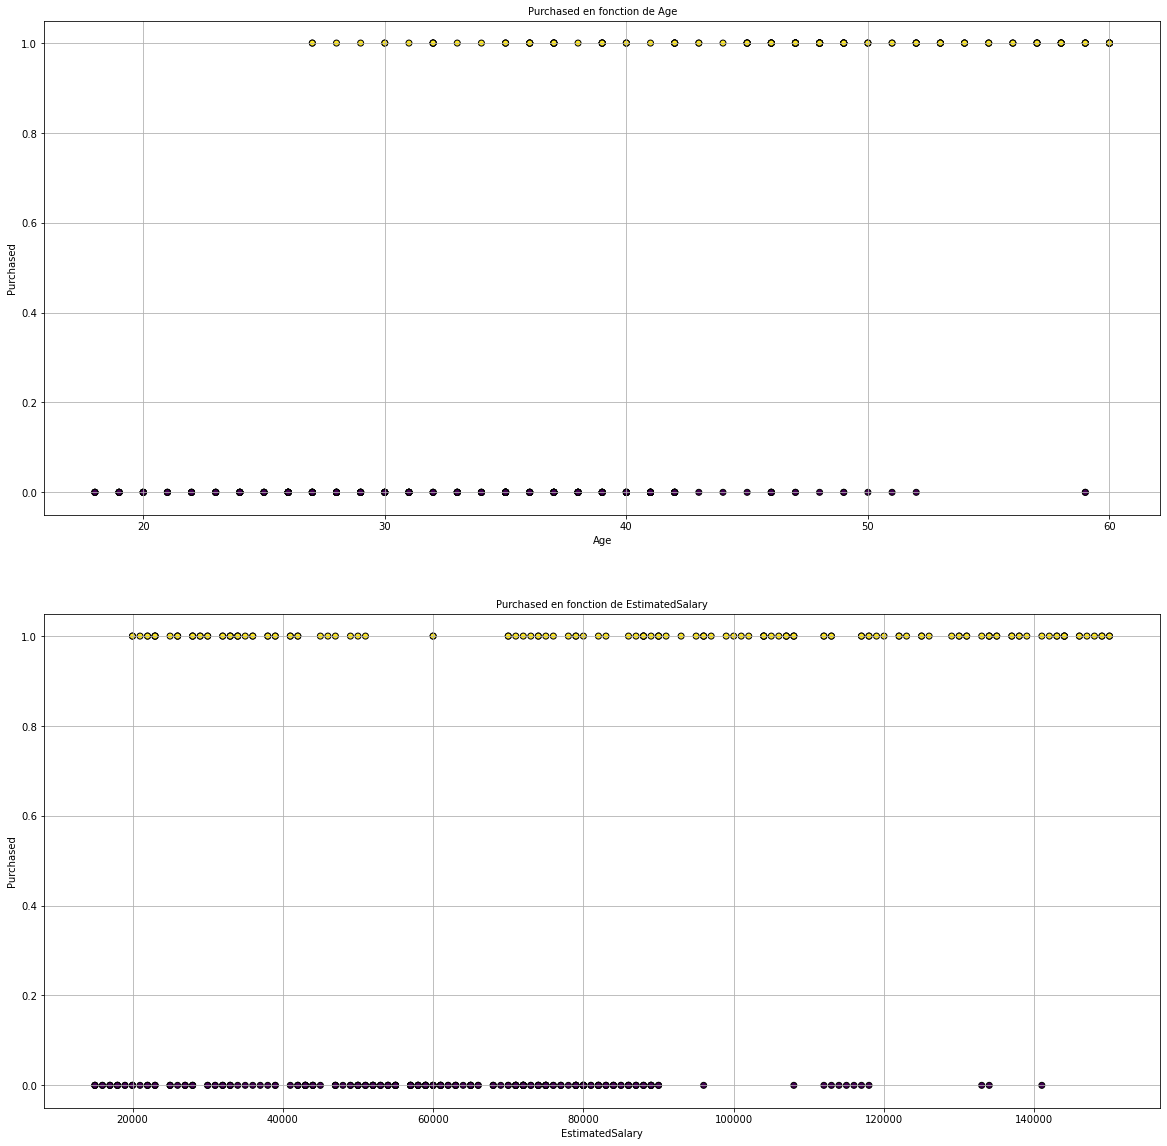

In [16]:
x1=np.array(DataClientsApple1["Age"])
x2=np.array(DataClientsApple1["EstimatedSalary"])
y=np.array(DataClientsApple1["Purchased"])
x1=x1.reshape(-1, 1)
x2=x2.reshape(-1, 1)

plt.figure()

g1 = plt.subplot(211)
plt.scatter(x1,y,marker='o',c=y,edgecolors='k')
plt.title('Purchased en fonction de Age', fontsize=10)
plt.xlabel("Age",fontsize=10)
plt.ylabel("Purchased",fontsize=10)
plt.grid()

g2 = plt.subplot(212)
plt.scatter(x2,y,marker='o',c=y,edgecolors='k')
plt.title('Purchased en fonction de EstimatedSalary', fontsize=10)
plt.xlabel("EstimatedSalary",fontsize=10)
plt.ylabel("Purchased",fontsize=10)


plt.grid()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train_1, X_test_1, y_train, y_test = train_test_split(x1, y,random_state=12)

In [19]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train_1, y_train)
clr1=clr.score(X_test_1, y_test)
clr2=clr.score(X_train_1, y_train)
clr3=clr.score(x1, y)

print(clr1,clr2,clr3)

0.79 0.8566666666666667 0.84


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_test, clr.predict(X_test_1))
conf

array([[52,  9],
       [12, 27]])

In [21]:
cf = pd.DataFrame(conf, columns=['prédit '+  str(_) for _ in  clr.classes_])
cf.index = ['vrai '+ str(_)  for _ in  clr.classes_]
cf

,prédit 0,prédit 1
vrai 0,52,9
vrai 1,12,27


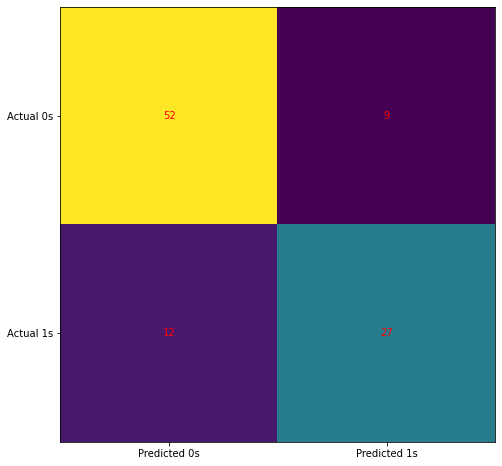

In [22]:


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf[i, j], ha='center', va='center', color='red')
plt.show()


In [23]:
#clr.decision_function(X_test_1)
#clr.predict_proba(X_test_1)

In [24]:
print(clr.coef_[0],clr.intercept_)


[0.20321949] [-8.6047479]


In [25]:
print(clr.coef_,clr.intercept_)
np.shape(clr.coef_)
np.shape(clr.intercept_)
loss = expit(x1 * clr.coef_ + clr.intercept_)
loss1=loss.ravel()
print(np.shape(clr.coef_),np.shape(clr.intercept_),np.shape(x1),np.shape(loss),np.shape(y),np.shape(loss1))

[[0.20321949]] [-8.6047479]
(1, 1) (1,) (400, 1) (400, 1) (400,) (400,)


In [26]:
## rapport de la régression

report = classification_report(y_test, clr.predict(X_test_1))
print('Le rapport de classification:', report, sep='\n')

Le rapport de classification:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        61
           1       0.75      0.69      0.72        39

    accuracy                           0.79       100
   macro avg       0.78      0.77      0.78       100
weighted avg       0.79      0.79      0.79       100



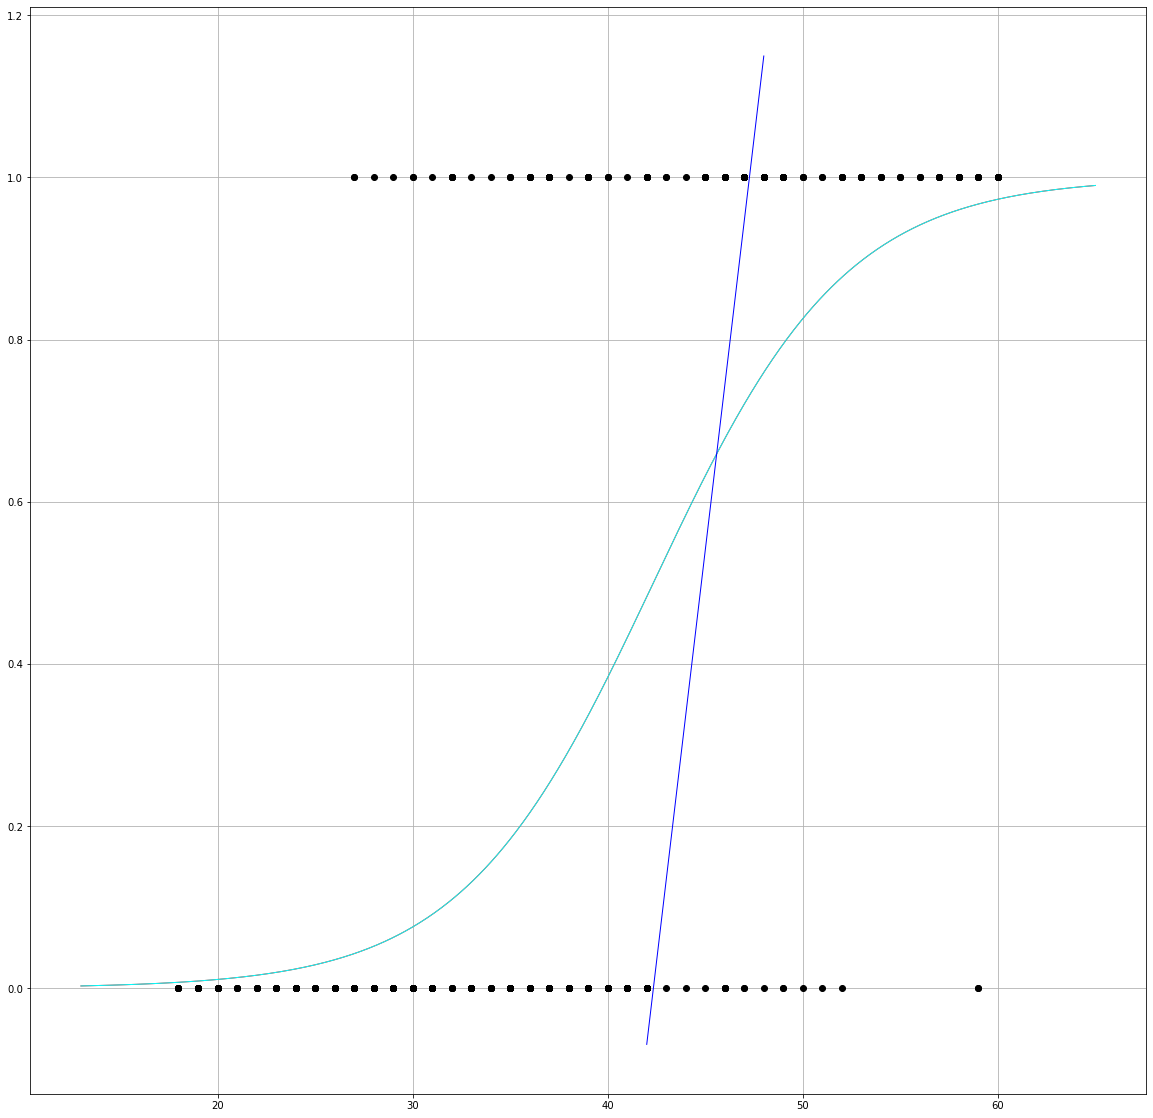

In [27]:
# prépartion du vecteur xx pour tracer la courbe 
xx= np.linspace(x1.min()-5, x1.max()+5, 1000)
xx=xx.reshape(-1,1)

xx1= np.linspace(42, 48, 1000)
xx1=xx1.reshape(-1,1)

# 1éré méthode en utilsant le calcul de probabilité 
loss = clr.predict_proba(xx)[:, 1] ## pour extraire la colonne ou a bien réussi à estimer
# 2 éme méthode en utilisant la fonction scpétiale de scipy expit
loss1 = expit(xx * clr.coef_ + clr.intercept_)

plt.figure() # ouverture d'une fénetre graphique pour la tarçage des courbes (juste vérification)
plt.scatter(x1, y, color='black', zorder=20) # notre data réel

plt.plot(xx, loss, color='red', linewidth=1) # courbe basé sur clr.predict_proba(xx)[:, 1]
plt.plot(xx, loss1, color='cyan', linewidth=1) # courbe basée sur expit

plt.plot(xx1,xx1 * clr.coef_ + clr.intercept_ , color='blue', linewidth=1)

plt.grid()
plt.show()

In [28]:
# La dernière colonne de notre base "Purchased"
yi = DataClientsApple1.iloc[:,-1] 
#yi = np.array(yi)
print(yi)
np.shape(yi)
#X (les autres) sont les variables qui précèdent la dernière 
xi =DataClientsApple1.iloc[:,:-1]
#xi= np.array(xi).reshape(-1,3)
print(xi)
np.shape(xi)


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


(400, 3)

In [29]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(xi, yi,random_state=12)

In [30]:
from sklearn import preprocessing
stds = preprocessing.StandardScaler()
XXi_train = stds.fit_transform(Xi_train)
XXi_test  = stds.fit_transform(Xi_test)
print(sc.stats.describe(XXi_train,axis=0,ddof=0))
print(sc.stats.describe(XXi_test,axis=0,ddof=0))
print(stds.scale_,stds.mean_)

DescribeResult(nobs=300, minmax=(array([-0.99335541, -1.8819747 , -1.63100201]), array([1.00668904, 2.19871386, 2.39236146])), mean=array([ 5.92118946e-17,  2.51650552e-16, -1.18423789e-16]), variance=array([1., 1., 1.]), skewness=array([0.01333363, 0.31955645, 0.51854647]), kurtosis=array([-1.99982221, -0.54155194, -0.30212227]))
DescribeResult(nobs=100, minmax=(array([-0.94169658, -1.87472214, -1.54281975]), array([1.06191317, 1.96429931, 2.17413968])), mean=array([-2.66453526e-17,  1.86517468e-16, -6.66133815e-18]), variance=array([1., 1., 1.]), skewness=array([ 0.12021658, -0.01763209,  0.42686212]), kurtosis=array([-1.98554797, -0.78389496, -0.7097864 ]))
[4.99099189e-01 1.09402879e+01 3.55128977e+04] [4.700e-01 3.851e+01 6.979e+04]


In [31]:
clrr=LogisticRegression()
clrr.fit(XXi_train, yi_train)
clrr1=clrr.score(XXi_train, yi_train)
clrr2=clrr.score(XXi_test, yi_test)
clrr3=clrr.score(xi, yi)

print(clrr1,clrr2,clrr3)

0.86 0.83 0.3575


In [32]:
# voir les coefficients standarisées de nottre régression: 
print(clrr.intercept_,clrr.coef_[0])

[-1.17843607] [0.07701317 2.46183265 1.17351216]


In [33]:
# coefficients dans la base de départ

In [34]:
coefUnstd =clrr.coef_[0] /stds.scale_
interceptUnStd =clrr.intercept_ + np.sum(clrr.coef_[0]*(-stds.mean_/stds.scale_))
print(coefUnstd,interceptUnStd)

[1.54304333e-01 2.25024485e-01 3.30446749e-05] [-12.22283986]


In [35]:
yi_pred=clrr.predict(XXi_test)

In [36]:

conf1 = confusion_matrix(yi_test, yi_pred)
conf1

array([[55,  6],
       [11, 28]])

In [37]:
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        61
           1       0.82      0.72      0.77        39

    accuracy                           0.83       100
   macro avg       0.83      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



In [38]:
#loss1 = expit(xx * clr.coef_ + clr.intercept_)
#plt.figure()
#plt.scatter(x1, y, color='black', zorder=20)
#loss= clr.predict_proba(x1)[:, 1]
#loss= clr.predict_proba(x1)

#plt.plot(xx, loss1, color='red', linewidth=3)

#plt.grid()
#plt.show()

In [39]:
# La dernière colonne de notre base "Purchased"
yii = DataClientsApple1.iloc[:,-1] 
#yi = np.array(yi)
print(yii)
np.shape(yii)
#X (les autres) sont les variables qui précèdent la dernière 
xii =DataClientsApple1.iloc[:,1:3]
#xi= np.array(xi).reshape(-1,3)
print(xii)
np.shape(xii)


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


(400, 2)

In [40]:
Xii_train, Xii_test, yii_train, yii_test = train_test_split(xii, yii,random_state=12)

In [41]:
from sklearn import preprocessing
stdss = preprocessing.StandardScaler()
XXii_train = stdss.fit_transform(Xii_train)
XXii_test  = stdss.fit_transform(Xii_test)
print(sc.stats.describe(XXii_train,axis=0,ddof=0))
print(sc.stats.describe(XXii_test,axis=0,ddof=0))

DescribeResult(nobs=300, minmax=(array([-1.8819747 , -1.63100201]), array([2.19871386, 2.39236146])), mean=array([ 2.51650552e-16, -1.18423789e-16]), variance=array([1., 1.]), skewness=array([0.31955645, 0.51854647]), kurtosis=array([-0.54155194, -0.30212227]))
DescribeResult(nobs=100, minmax=(array([-1.87472214, -1.54281975]), array([1.96429931, 2.17413968])), mean=array([ 1.86517468e-16, -6.66133815e-18]), variance=array([1., 1.]), skewness=array([-0.01763209,  0.42686212]), kurtosis=array([-0.78389496, -0.7097864 ]))


In [42]:
clrrr=LogisticRegression()
clrrr.fit(XXii_train, yii_train)
clrrr1=clrrr.score(XXii_train, yii_train)
clrrr2=clrrr.score(XXii_test, yii_test)
clrrr3=clrrr.score(xii, yii)

print(clrrr1,clrrr2,clrrr3)

0.8566666666666667 0.85 0.3575


In [43]:
# voir les coefficients standarisées de nottre régression: 
print(clrrr.intercept_,clrrr.coef_[0])

[-1.16837836] [2.4466809  1.16892289]


In [44]:
# voir les coefficients standarisées de nottre régression: 
print(clrr.intercept_,clrr.coef_[0])

[-1.17843607] [0.07701317 2.46183265 1.17351216]


In [45]:
coefUnstdd =clrrr.coef_[0] /stdss.scale_
interceptUnStdd =clrrr.intercept_ +np.sum(clrrr.coef_[0]*(-stdss.mean_/stdss.scale_))
print(coefUnstdd,interceptUnStdd)



[2.23639535e-01 3.29154467e-05] [-12.07790587]
